# Assignment #2


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** 1398/9/23 23:59
- If you need any additional information, please review the assignment page on the course website.
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: []()

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)



---



Fill your information here & run the cell

In [ ]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id = 95521378 #@param {type:"integer"}
student_name = "Omid Ghahroodi" #@param {type:"string"}
Your_Github_account_Email = "oghahroodi98@gmail.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg02')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95521378
your name: Omid Ghahroodi


# 1. Special Bus Line

Consider the public transport bus service. It has many gates on roads in the city and a particular lane for bus transportation.


This lane is also used for the transportation of emergency vehicles like ambulances, police cars and fire trucks, and private cars are banned from using it.


Your task is to create a system to classify these two classes of vehicles.

### Dataset
---
In this task, you should build your dataset based on an arbitrary approach. Of course, we suggest having a look at [this](https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688) link if you do not have any idea about making the dataset.



Please explain your dataset making method.

In [ ]:
!pip install requests


In [ ]:
from requests import exceptions
import argparse
import requests
import cv2
import os

def make_data_of_img(image, num_of_data, output_path):
  # set your Microsoft Cognitive Services API key along with (1) the
  # maximum number of results for a given search and (2) the group size
  # for results (maximum of 50 per request)
  API_KEY = "eddad25108a44ff19b376aa45490041a"
  MAX_RESULTS = num_of_data
  GROUP_SIZE = 50
  
  # set the endpoint API URL
  URL = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"



  # when attempting to download images from the web both the Python
  # programming language and the requests library have a number of
  # exceptions that can be thrown so let's build a list of them now
  # so we can filter on them
  EXCEPTIONS = set([IOError, FileNotFoundError,exceptions.RequestException, exceptions.HTTPError,exceptions.ConnectionError, exceptions.Timeout])
  # EXCEPTIONS = set()

  # store the search term in a convenience variable then set the
  # headers and search parameters
  term = image
  headers = {"Ocp-Apim-Subscription-Key" : API_KEY}
  params = {"q": term, "offset": 0, "count": GROUP_SIZE}

  # make the search
  print("[INFO] searching Bing API for '{}'".format(term))
  search = requests.get(URL, headers=headers, params=params)
  search.raise_for_status()

  # grab the results from the search, including the total number of
  # estimated results returned by the Bing API
  results = search.json()
  estNumResults = min(results["totalEstimatedMatches"], MAX_RESULTS)
  print("[INFO] {} total results for '{}'".format(estNumResults,term))

  # initialize the total number of images downloaded thus far
  total = 0


  # loop over the estimated number of results in `GROUP_SIZE` groups
  for offset in range(0, estNumResults, GROUP_SIZE):
      # update the search parameters using the current offset, then
      # make the request to fetch the results
      print("[INFO] making request for group {}-{} of {}...".format(offset, offset + GROUP_SIZE, estNumResults))
      params["offset"] = offset
      search = requests.get(URL, headers=headers, params=params)
      search.raise_for_status()
      results = search.json()
      print("[INFO] saving images for group {}-{} of {}...".format(offset, offset + GROUP_SIZE, estNumResults))

      # print(results)
      # loop over the results
      for v in results["value"]:
          # try to download the image
          try:
              # make a request to download the image
              print("[INFO] fetching: {}".format(v["contentUrl"]))
              r = requests.get(v["contentUrl"], timeout=30)

              # build the path to the output image
              ext = v["contentUrl"][v["contentUrl"].rfind("."):]
              p = os.path.sep.join([output_path, "{}{}".format(str(total).zfill(8), ext)])
              print(p)

              # write the image to disk
              f = open(p, "wb")
              f.write(r.content)
              f.close()

          # catch any errors that would not unable us to download the
          # image
          except Exception as e:
              # check to see if our exception is in our list of
              # exceptions to check for
              if type(e) in EXCEPTIONS:
                  print("[INFO] skipping: {}".format(v["contentUrl"]))
                  continue

          # try to load the image from disk
          image = cv2.imread(p)

          # if the image is `None` then we could not properly load the
          # image from disk (so it should be ignored)
          if image is None:
              print("[INFO] deleting: {}".format(p))
              os.remove(p)
              continue

          # update the counter
          total += 1

In [ ]:
!rm -rf dataset
!mkdir dataset
!mkdir dataset/normal_vehicles
!mkdir dataset/emergency_vehicles
!mkdir dataset/emergency_vehicles/ambulances
!mkdir dataset/emergency_vehicles/bus
!mkdir dataset/emergency_vehicles/fire_trucks
!mkdir dataset/emergency_vehicles/police_cars
make_data_of_img(image='car',num_of_data=4000,output_path='dataset/normal_vehicles')
make_data_of_img(image='ambulances',num_of_data=1000,output_path='dataset/emergency_vehicles/ambulances')
make_data_of_img(image='bus',num_of_data=1000,output_path='dataset/emergency_vehicles/bus')
make_data_of_img(image='fire trucks',num_of_data=1000,output_path='dataset/emergency_vehicles/fire_trucks')
make_data_of_img(image='police cars',num_of_data=1000,output_path='dataset/emergency_vehicles/police_cars')


[INFO] searching Bing API for 'car'


HTTPError: ignored

In [ ]:
!cp -r dataset drive/My\ Drive

cp: cannot create directory 'drive/My Drive': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!rm -rf data
!mkdir data
!mkdir data/train
!mkdir data/train/emergency_vehicles/
!mkdir data/train/normal_vehicles/

!mkdir data/validation
!mkdir data/validation/emergency_vehicles/
!mkdir data/validation/normal_vehicles/


In [ ]:
from shutil import copy
import os
import random

c=0
for i in os.listdir('drive/My Drive/dataset/normal_vehicles'):
    if (c==500):
        break
    f = os.path.join('drive/My Drive/dataset/normal_vehicles',i)
    if (f.split('.')[-1]=='jpg'):
        # print(f)
        c+=1
        if (random.randint(0,9)<=7):
            copy(f, '/content/data/train/normal_vehicles/')
        else:
            copy(f, '/content/data/validation/normal_vehicles/')


c=0
for i in os.listdir('drive/My Drive/dataset/emergency_vehicles/ambulances'):
    if (c==125):
        break
    f = os.path.join('drive/My Drive/dataset/emergency_vehicles/ambulances',i)
    if (f.split('.')[-1]=='jpg'):
        # print(f)
        c+=1
        if (random.randint(0,9)<=7):
            copy(f, '/content/data/train/emergency_vehicles/')
        else:
            copy(f, '/content/data/validation/emergency_vehicles/')




c=0
for i in os.listdir('drive/My Drive/dataset/emergency_vehicles/bus'):
    if (c==125):
        break
    f = os.path.join('drive/My Drive/dataset/emergency_vehicles/bus',i)
    if (f.split('.')[-1]=='jpg'):
        # print(f)
        c+=1
        if (random.randint(0,9)<=7):
            copy(f, '/content/data/train/emergency_vehicles/')
        else:
            copy(f, '/content/data/validation/emergency_vehicles/')


c=0
for i in os.listdir('drive/My Drive/dataset/emergency_vehicles/fire_trucks'):
    if (c==125):
        break
    f = os.path.join('drive/My Drive/dataset/emergency_vehicles/fire_trucks',i)
    if (f.split('.')[-1]=='jpg'):
        # print(f)
        c+=1
        if (random.randint(0,9)<=7):
            copy(f, '/content/data/train/emergency_vehicles/')
        else:
            copy(f, '/content/data/validation/emergency_vehicles/')



c=0
for i in os.listdir('drive/My Drive/dataset/emergency_vehicles/police_cars'):
    if (c==125):
        break
    f = os.path.join('drive/My Drive/dataset/emergency_vehicles/police_cars',i)
    if (f.split('.')[-1]=='jpg'):
        # print(f)
        c+=1
        if (random.randint(0,9)<=7):
            copy(f, '/content/data/train/emergency_vehicles/')
        else:
            copy(f, '/content/data/validation/emergency_vehicles/')

In order to build our deep learning image dataset, we are going to utilize Microsoft’s Bing Image Search API, which is part of Microsoft’s Cognitive Services used to bring AI to vision, speech, text, and more to apps and software.  

I did not want to have to open my browser or utilize browser extensions to download the image files from my search.

First i registered into Microsoft’s Cognitive Services and got API keys and end points then i installed request library.
The requests  package makes it super easy for us to make HTTP requests and not get bogged down in fighting with Python to gracefully handle requests.

The one part of this script that you must modify is the API_KEY . You can grab an API key by logging into Microsoft Cognitive Services and selecting the service you’d like to use (as shown above where you need to click the “Get API Key” button). From there, simply paste the API key within the quotes for this variable.

You can also modify MAX_RESULTS  and GROUP_SIZE  for your search. Here, I’m limiting my results to the first 4000  images for each class and returning the maximum number of images per request by the Bing API ( 50  total images).

Then we’re going to loop over the current batch of image address and attempt to download each individual image to our output folder.

We establish a try-catch block so that we can catch the possible EXCEPTIONS  which we defined earlier in the script. If we encounter an exception we’ll be skipping that particular image and moving forward

We then try to open and write the file to disk.


REF:https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/


### Implementation
---
You can use from Keras in this assignment.

Preprocess your data in this cell.

In [ ]:
from keras.layers import Activation, Input, Dropout,Flatten
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K
from random import shuffle 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import matplotlib as plt



def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))



img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = len(os.listdir('data/train/emergency_vehicles'))+len(os.listdir('data/train/normal_vehicles'))
nb_validation_samples = len(os.listdir('data/validation/emergency_vehicles'))+len(os.listdir('data/validation/normal_vehicles'))
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

save_dir = os.path.join(os.getcwd(), 'asg02')
model_name = 'HW2.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)


Using TensorFlow backend.


Build and train your model in the following cell.

Use generator and augmentation in order to feed data to the network.

In [ ]:


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=["accuracy",f1,recall,precision])

print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      25632     
_________________________________________________________________
activation_2 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
____________________________________

Now, test your model, report the f1-score, recall and precision, and then save the model in a file with path 'ASSIGNMENT_PATH / 'my_model.h5''.

Plot loss and accuracy.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)




Found 470 images belonging to 2 classes.
Found 142 images belonging to 2 classes.



Epoch 1/10





29/29 [==============================] - 25s 860ms/step - loss: 5.0304 - acc: 0.6730 - f1: 0.7972 - recall: 0.9867 - precision: 0.6821 - val_loss: 8.8430 - val_acc: 0.4453 - val_f1: 0.6087 - val_recall: 1.0000 - val_precision: 0.4453
Epoch 2/10
29/29 [==============================] - 25s 861ms/step - loss: 5.3790 - acc: 0.6626 - f1: 0.7876 - recall: 1.0000 - precision: 0.6626 - val_loss: 8.7304 - val_acc: 0.4524 - val_f1: 0.6156 - val_recall: 1.0000 - val_precision: 0.4524
Epoch 3/10
29/29 [==============================] - 23s 800ms/step - loss: 5.2959 - acc: 0.6682 - f1: 0.7906 - recall: 0.9484 - precision: 0.6890 - val_loss: 7.9712 - val_acc: 0.5000 - val_f1: 0.6601 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 4/10
29/29 [==============================] - 23s 808ms/step - loss: 5.5691 - acc: 0.6510 - f1: 0.7809 - recall: 0.9602 - precision: 0.6668 - val_loss: 9.3630 - val_acc:

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense



img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = len(os.listdir('data/train/emergency_vehicles'))+len(os.listdir('data/train/normal_vehicles'))
nb_validation_samples = len(os.listdir('data/validation/emergency_vehicles'))+len(os.listdir('data/validation/normal_vehicles'))
epochs = 10
batch_size = 16


# build the VGG16 network
m = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
print('Model loaded.')
print(m.summary())
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(m)

model.add(top_model)


for layer in model.layers[:25]:
    layer.trainable = True


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=["accuracy",f1,recall,precision])
print(model.summary())


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    callbacks=callbacks,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Model loaded.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128

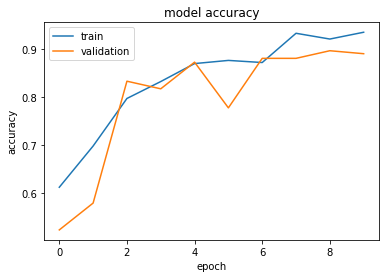

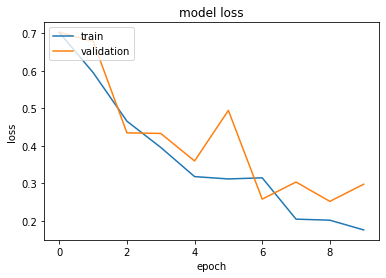

In [ ]:
import matplotlib.pyplot as plt 


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Please explain that what type of loss and accuracy you set for training your model and why?

I used binary crossentropy because it is a loss function that is used for single label categorization. This is when only one category is applicable for each data point. In other words, an example can belong to one class only.

Visualize some layers and analyze them.

In [ ]:
from __future__ import print_function

import time
import numpy as np
from PIL import Image as pil_image
from keras.preprocessing.image import save_img
from keras import layers
from keras.applications import vgg16
from keras import backend as K


def normalize(x):
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def process_image(x, former):
    if K.image_data_format() == 'channels_first':
        x = x.transpose((2, 0, 1))
    return (x / 255 - 0.5) * 4 * former.std() + former.mean()


def visualize_layer(model,
                    layer_name,
                    step=1.,
                    epochs=15,
                    upscaling_steps=9,
                    upscaling_factor=1.2,
                    output_dim=(412, 412),
                    filter_range=(0, None)):
 

    def _generate_filter_image(input_img,
                               layer_output,
                               filter_index):

        s_time = time.time()
        if K.image_data_format() == 'channels_first':
            loss = K.mean(layer_output[:, filter_index, :, :])
        else:
            loss = K.mean(layer_output[:, :, :, filter_index])
        grads = K.gradients(loss, input_img)[0]
        grads = normalize(grads)
        iterate = K.function([input_img], [loss, grads])

        intermediate_dim = tuple(
            int(x / (upscaling_factor ** upscaling_steps)) for x in output_dim)
        if K.image_data_format() == 'channels_first':
            input_img_data = np.random.random(
                (1, 3, intermediate_dim[0], intermediate_dim[1]))
        else:
            input_img_data = np.random.random(
                (1, intermediate_dim[0], intermediate_dim[1], 3))
        input_img_data = (input_img_data - 0.5) * 20 + 128

        for up in reversed(range(upscaling_steps)):
            for _ in range(epochs):
                loss_value, grads_value = iterate([input_img_data])
                input_img_data += grads_value * step
                if loss_value <= K.epsilon():
                    return None

            intermediate_dim = tuple(
                int(x / (upscaling_factor ** up)) for x in output_dim)
            img = deprocess_image(input_img_data[0])
            img = np.array(pil_image.fromarray(img).resize(intermediate_dim,
                                                           pil_image.BICUBIC))
            input_img_data = np.expand_dims(
                process_image(img, input_img_data[0]), 0)

        img = deprocess_image(input_img_data[0])
        e_time = time.time()
        print('Costs of filter {:3}: {:5.0f} ( {:4.2f}s )'.format(filter_index,
                                                                  loss_value,
                                                                  e_time - s_time))
        return img, loss_value

    def _draw_filters(filters, n=None):

        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype='uint8')

        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        save_img('vgg_{0:}_{1:}x{1:}.png'.format(layer_name, n), stitched_filters)

    assert len(model.inputs) == 1
    input_img = model.inputs[0]

    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

    output_layer = layer_dict[layer_name]
    assert isinstance(output_layer, layers.Conv2D)

    filter_lower = filter_range[0]
    filter_upper = (filter_range[1]
                    if filter_range[1] is not None
                    else len(output_layer.get_weights()[1]))
    assert(filter_lower >= 0
           and filter_upper <= len(output_layer.get_weights()[1])
           and filter_upper > filter_lower)
    print('Compute filters {:} to {:}'.format(filter_lower, filter_upper))

    processed_filters = []
    for f in range(filter_lower, filter_upper):
        img_loss = _generate_filter_image(input_img, output_layer.output, f)

        if img_loss is not None:
            processed_filters.append(img_loss)

    print('{} filter processed.'.format(len(processed_filters)))
    _draw_filters(processed_filters)

LAYER_NAME = 'block4_conv1'
print(m.summary())

visualize_layer(m, LAYER_NAME)

شبکه دارای ساختار سلسله مراتبی است به طوری که فیلترهای نمایش داده شده در لایه‌های اول ویژگی های ساده ماننده خطوط عمودی را پیدا میکنند و در لایه های جلوتر این ویژگی ها باهم ترکیب شده و به عنوان مثال اژیر ماشین پلیس را پیدا میکنند.

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg02__xx__xx.zip`) and submit it via [https://forms.gle/Fb7gvVJHp8RePvo6A](https://forms.gle/Fb7gvVJHp8RePvo6A).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [ ]:
!rm -rf /content/iust-deep-learning-assignments

In [ ]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_02'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg02__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 02 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

.login	oghahroodi
.id	44407313
.node_id	MDQ6VXNlcjQ0NDA3MzEz
.avatar_url	https://avatars2.githubusercontent.com/u/44407313?v=4
.gravatar_id	
.url	https://api.github.com/users/oghahroodi
.html_url	https://github.com/oghahroodi
.followers_url	https://api.github.com/users/oghahroodi/followers
.following_url	https://api.github.com/users/oghahroodi/following{/other_user}
.gists_url	https://api.github.com/users/oghahroodi/gists{/gist_id}
.starred_url	https://api.github.com/users/oghahroodi/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/oghahroodi/subscriptions
.organizations_url	https://api.github.com/users/oghahroodi/orgs
.repos_url	https://api.github.com/users/oghahroodi/repos
.events_url	https://api.github.com/users/oghahroodi/events{/privacy}
.received_events_url	https://api.github.com/users/oghahroodi/received_events
.type	User
.site_admin	false
.name	Omid Ghahroodi
.company	
.blog	
.location	
.email	
.hireable	
\nResearch interests:AI, Quantum  Computing, Crypto

## Download Submission (Run the cell)

In [ ]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg02_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.